In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [2]:
def visualise_mle_prediction(dataframe, no_features, first_feature, last_feature, location_line, line=False):
    fig, axes = plt.subplots(no_features, 1, figsize=(30,40))
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        # Values for drawing lower and upper bound
        target = dataframe.iloc[:,i].values
        mu = dataframe.iloc[:,i+no_features].values
        sigma = dataframe.iloc[:,i+2*no_features].values
        lower_bound = mu - 2*sigma
        upper_bound = mu + 2* sigma
        
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+4*no_features+1].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["blue"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["blue","red"]

        # Predicted mu
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_feature],
                     linewidth=1,
                     color="black")
        
        # Confidence bound (+- 2 sigma)
        ax[i-first_feature].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5)
        
        # Target values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature], 
                        hue=columns[i+4*no_features+1],
                        palette=palette
                        )   
        
        # Line for transition between phases     
        if line:
            ax[i-first_feature].axvline(location_line, 0,2, color="r", linestyle ="--", linewidth=2)

## Change of Degeneration Level

In [3]:
start_phase_1 = 22475
start_phase_2 = 36415

# Visualisation of Prediction - Cpps Data with small degeneration
## Phase 0 - no error

In [6]:
artifical_data = pd.read_csv("../../files/prediction/MLE/cpps_new_2sigma.csv", sep=";")
artifical_data = artifical_data.iloc[:2000,:]

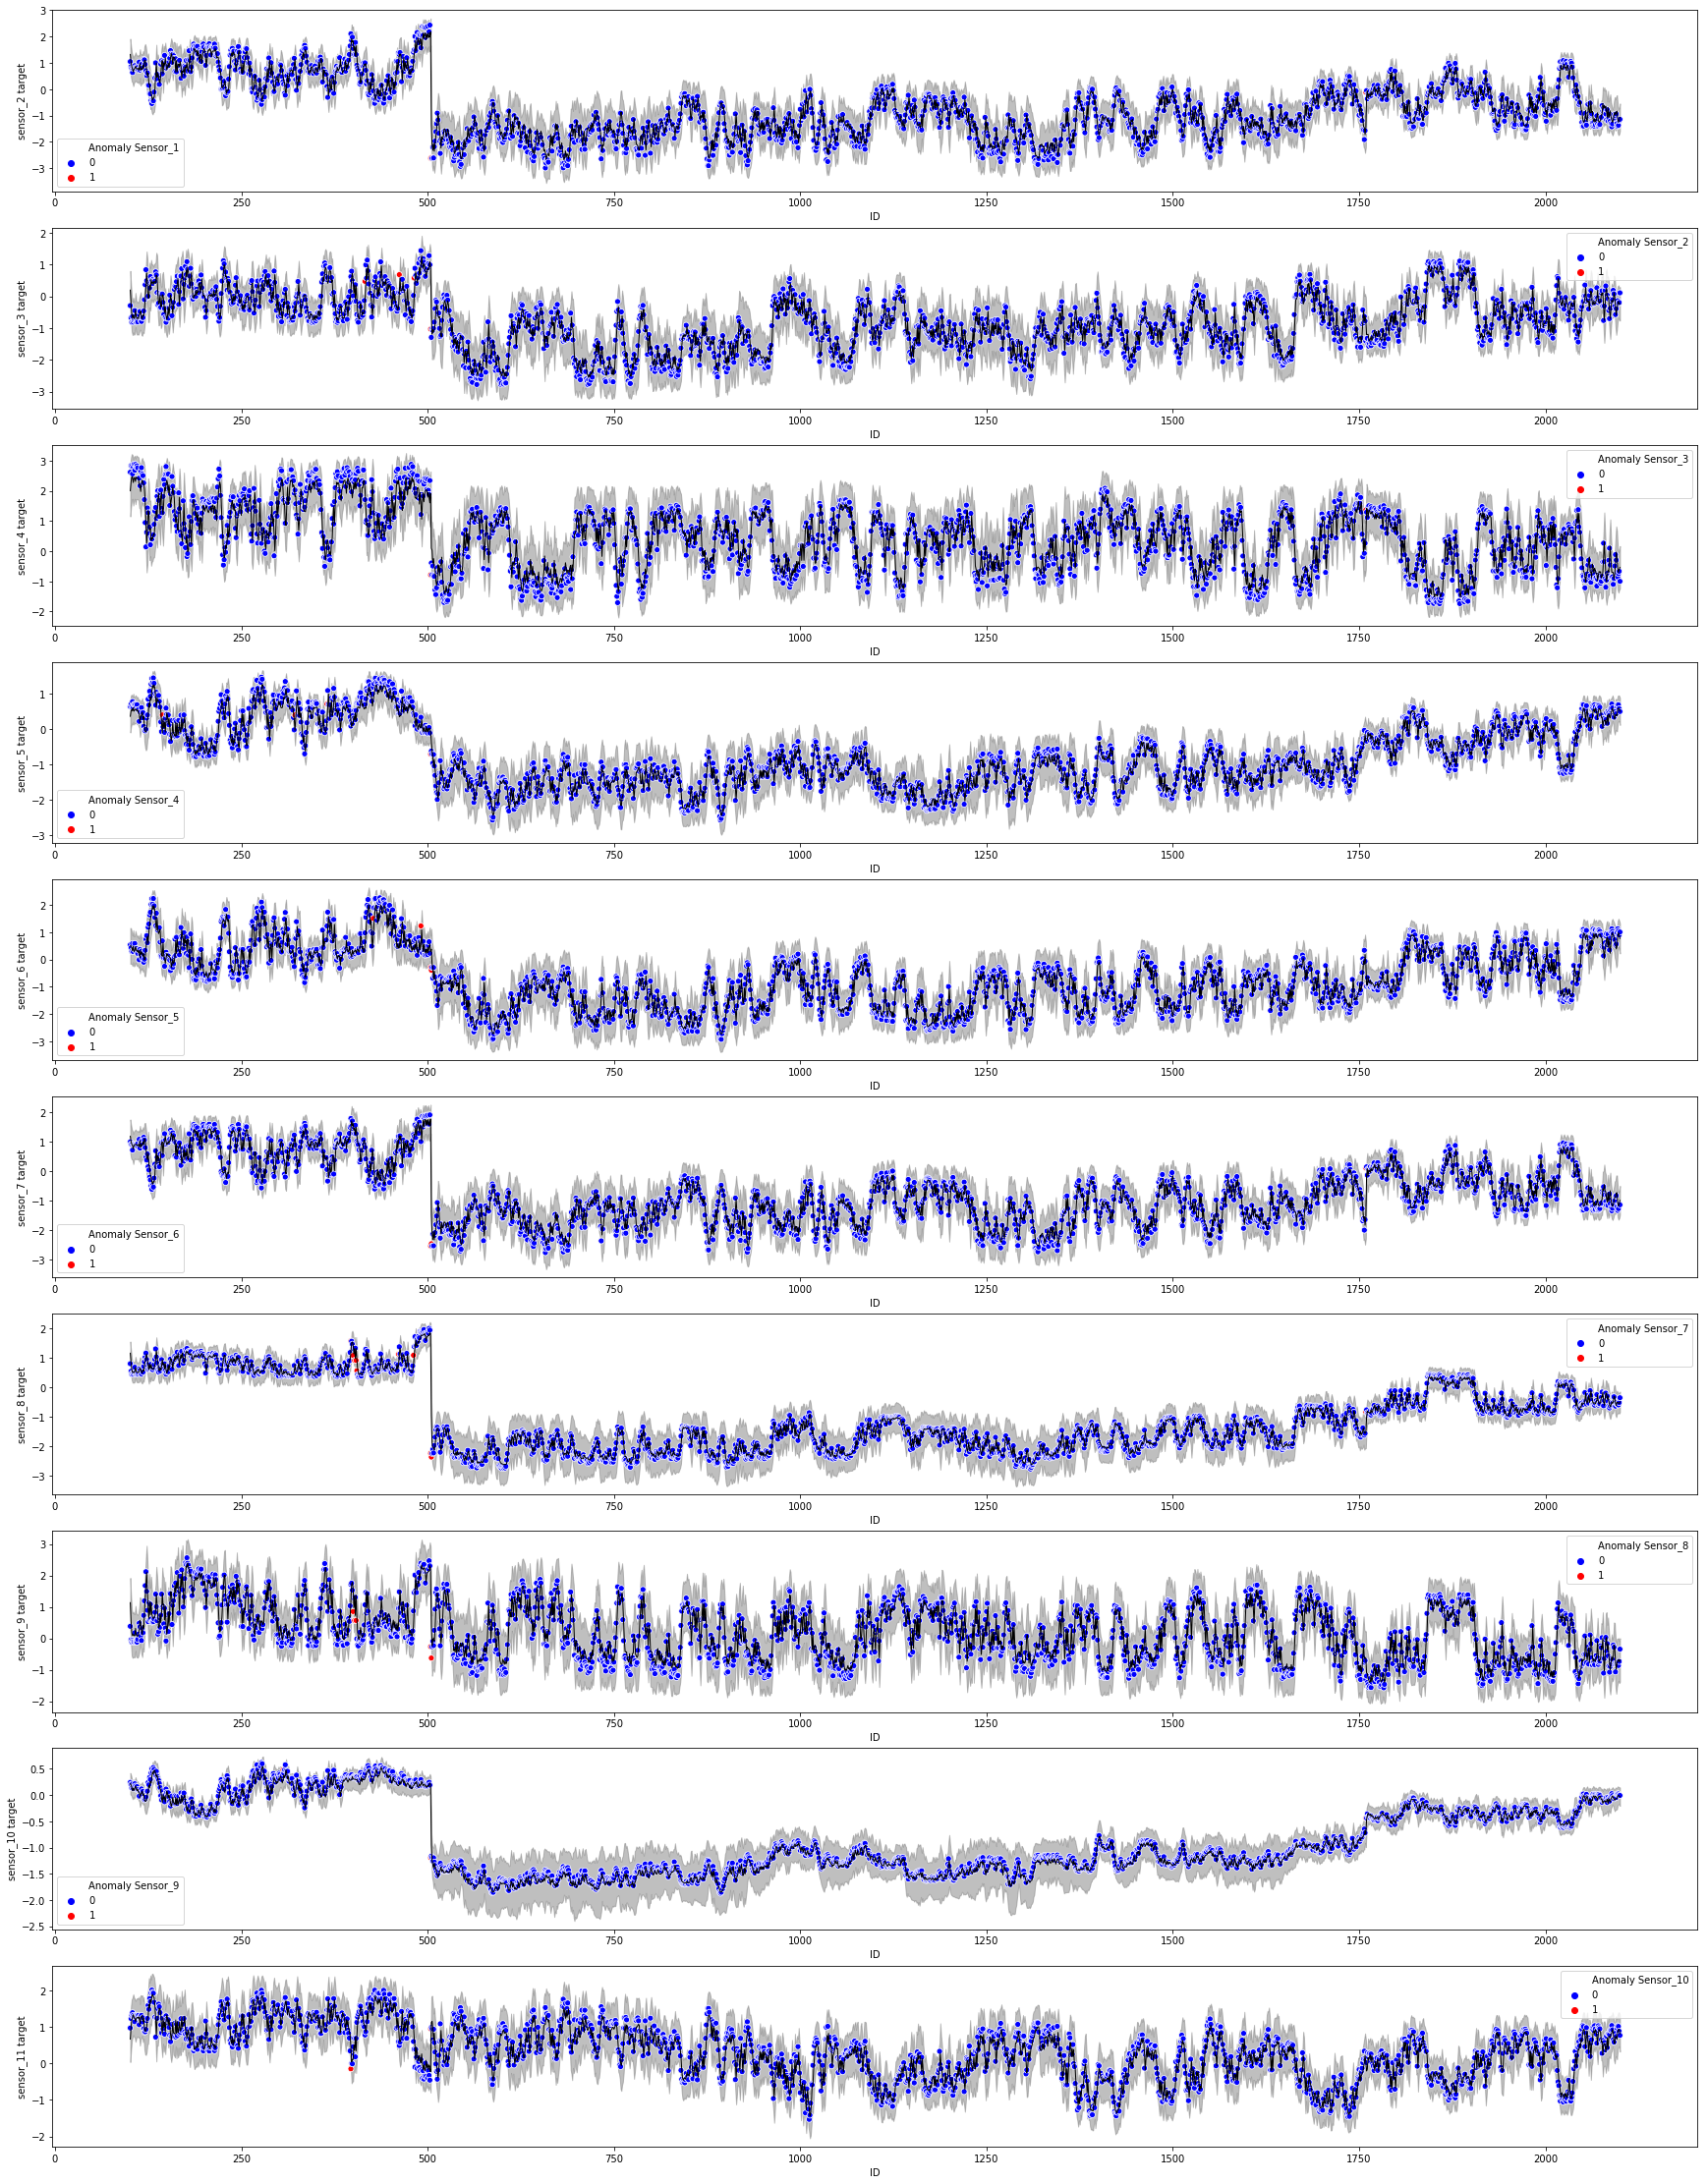

In [7]:
visualise_mle_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = False,
                         location_line = start_phase_1
                        )
plt.show()

## Transistion from Phase 0 to Phase 1

In [8]:
artifical_data = pd.read_csv("../../files/prediction/MLE/cpps_new_2sigma.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_1-200:28000,:]

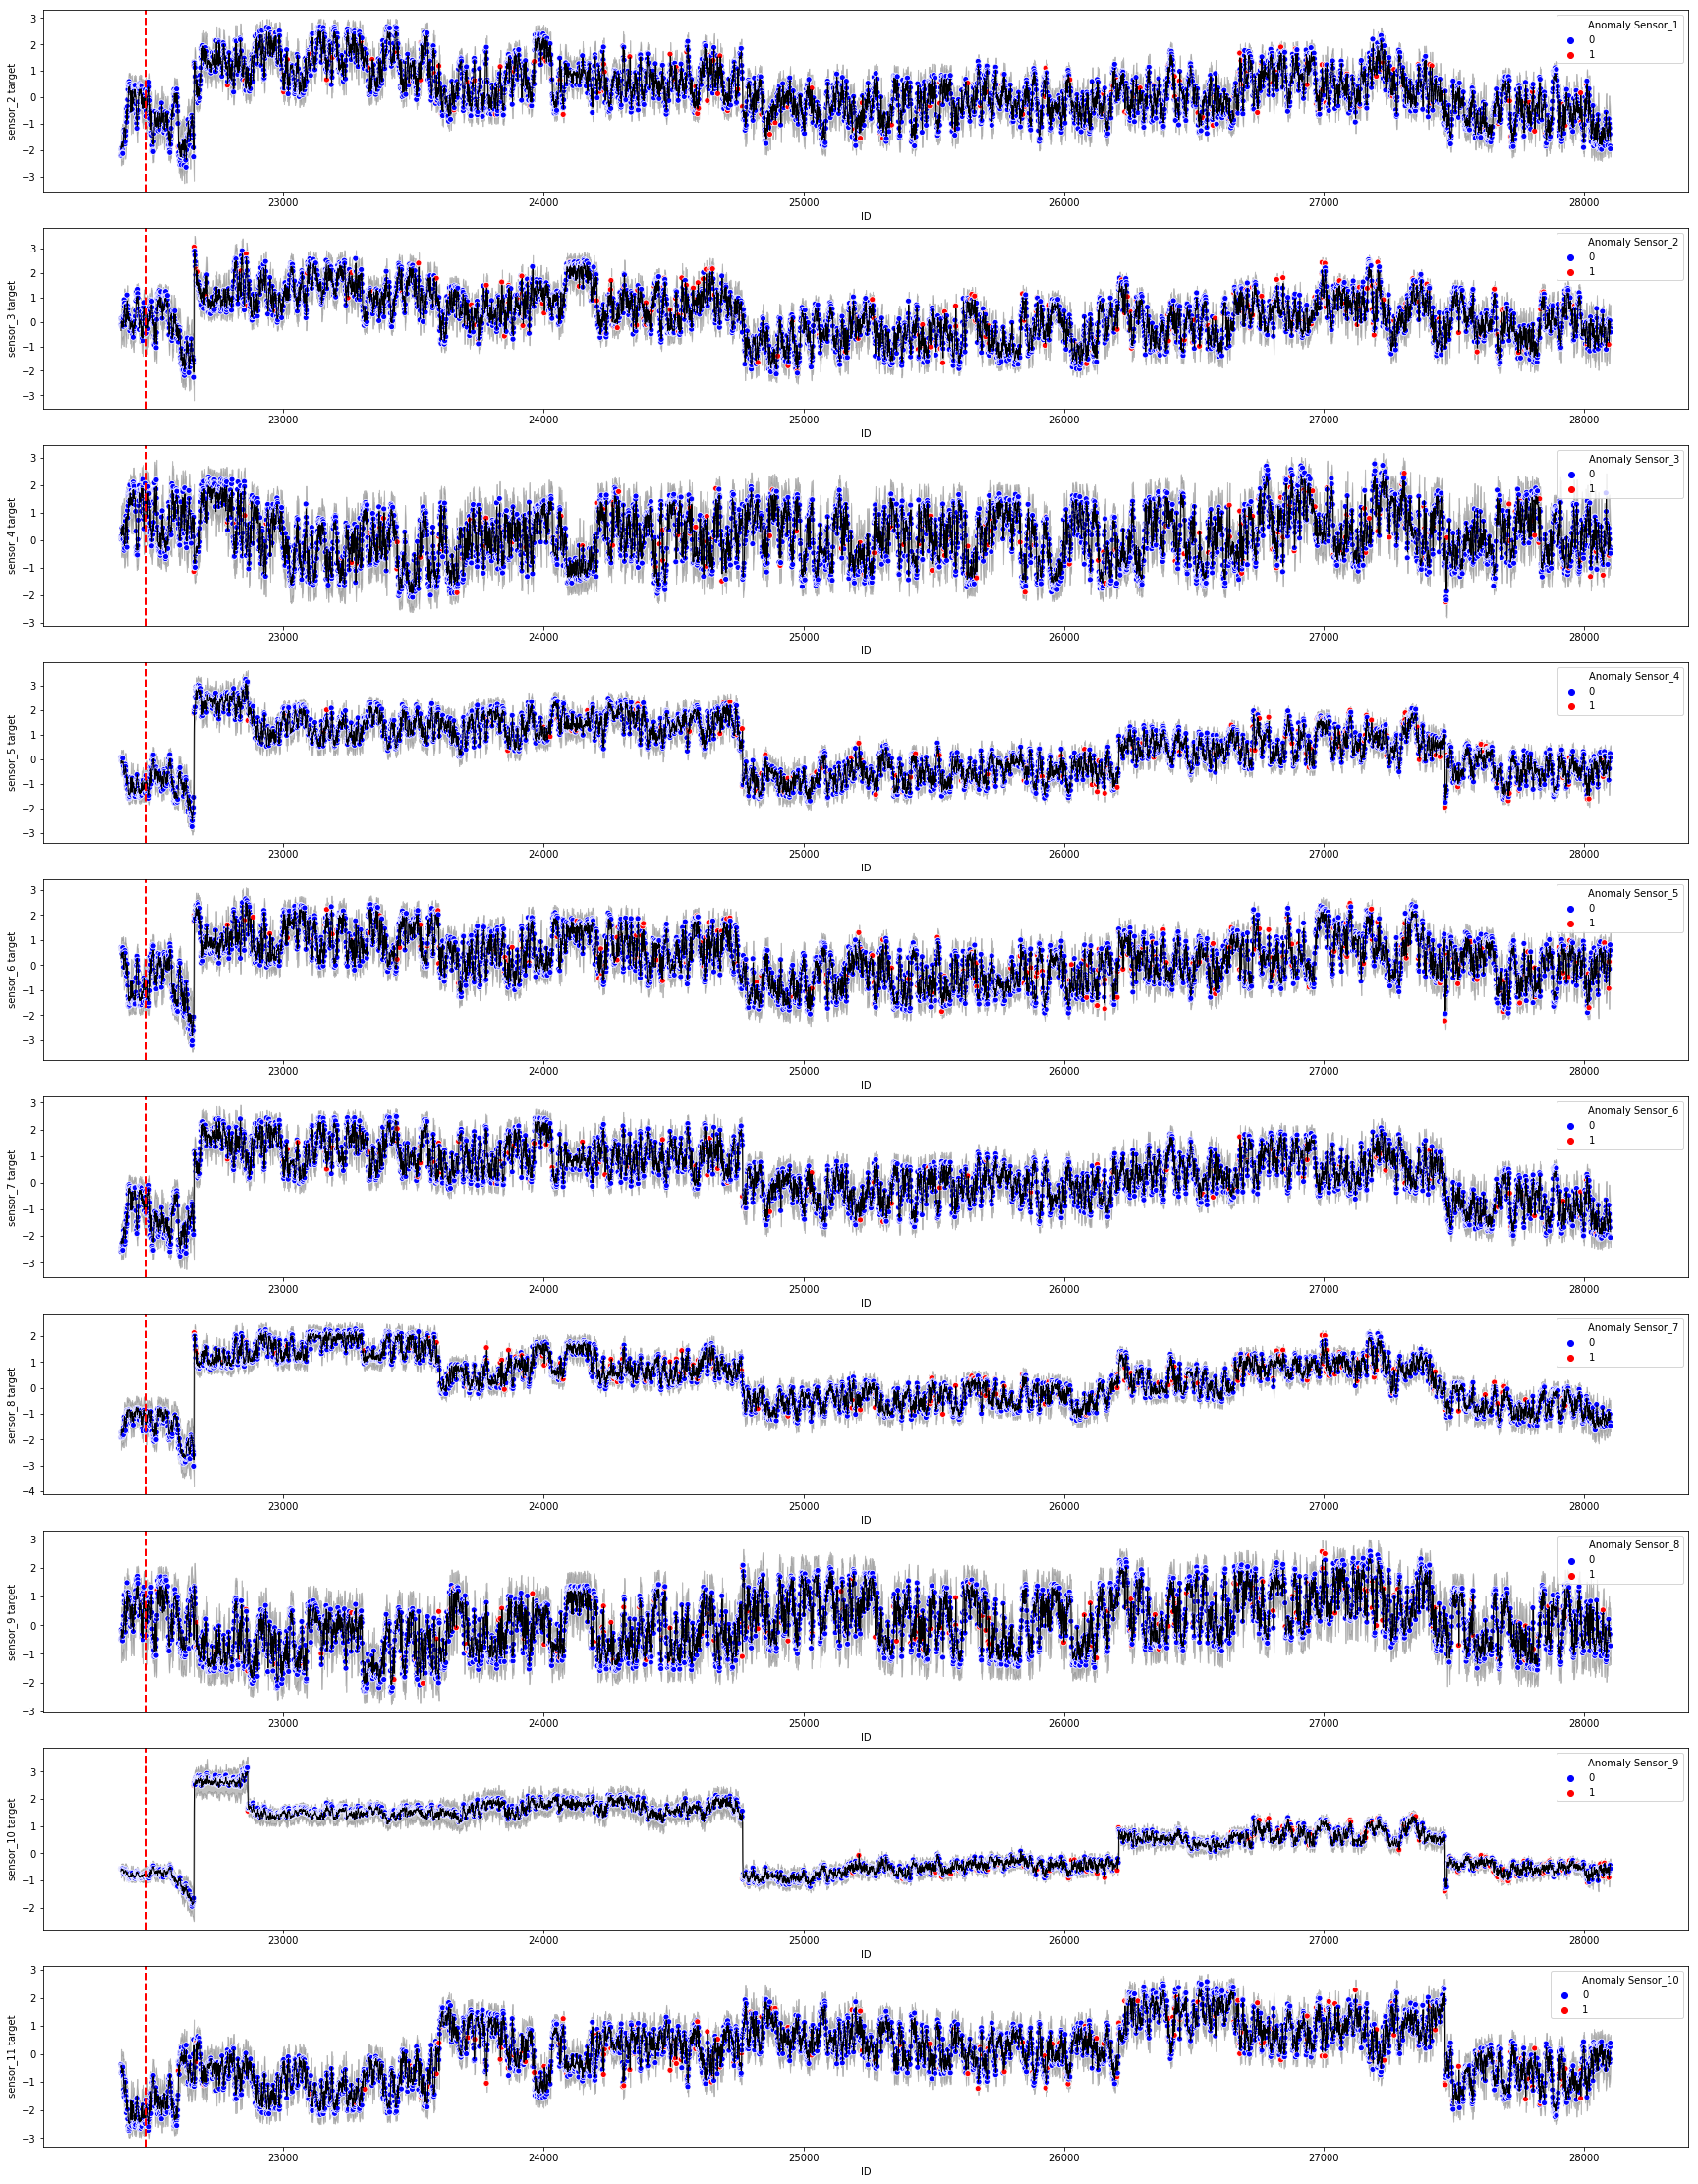

In [9]:
visualise_mle_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = True,
                         location_line = start_phase_1
                        )
plt.show()

## Transistion from Phase 1 to Phase 2

In [10]:
artifical_data = pd.read_csv("../../files/prediction/MLE/cpps_new_2sigma.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_2-300:41000,:]

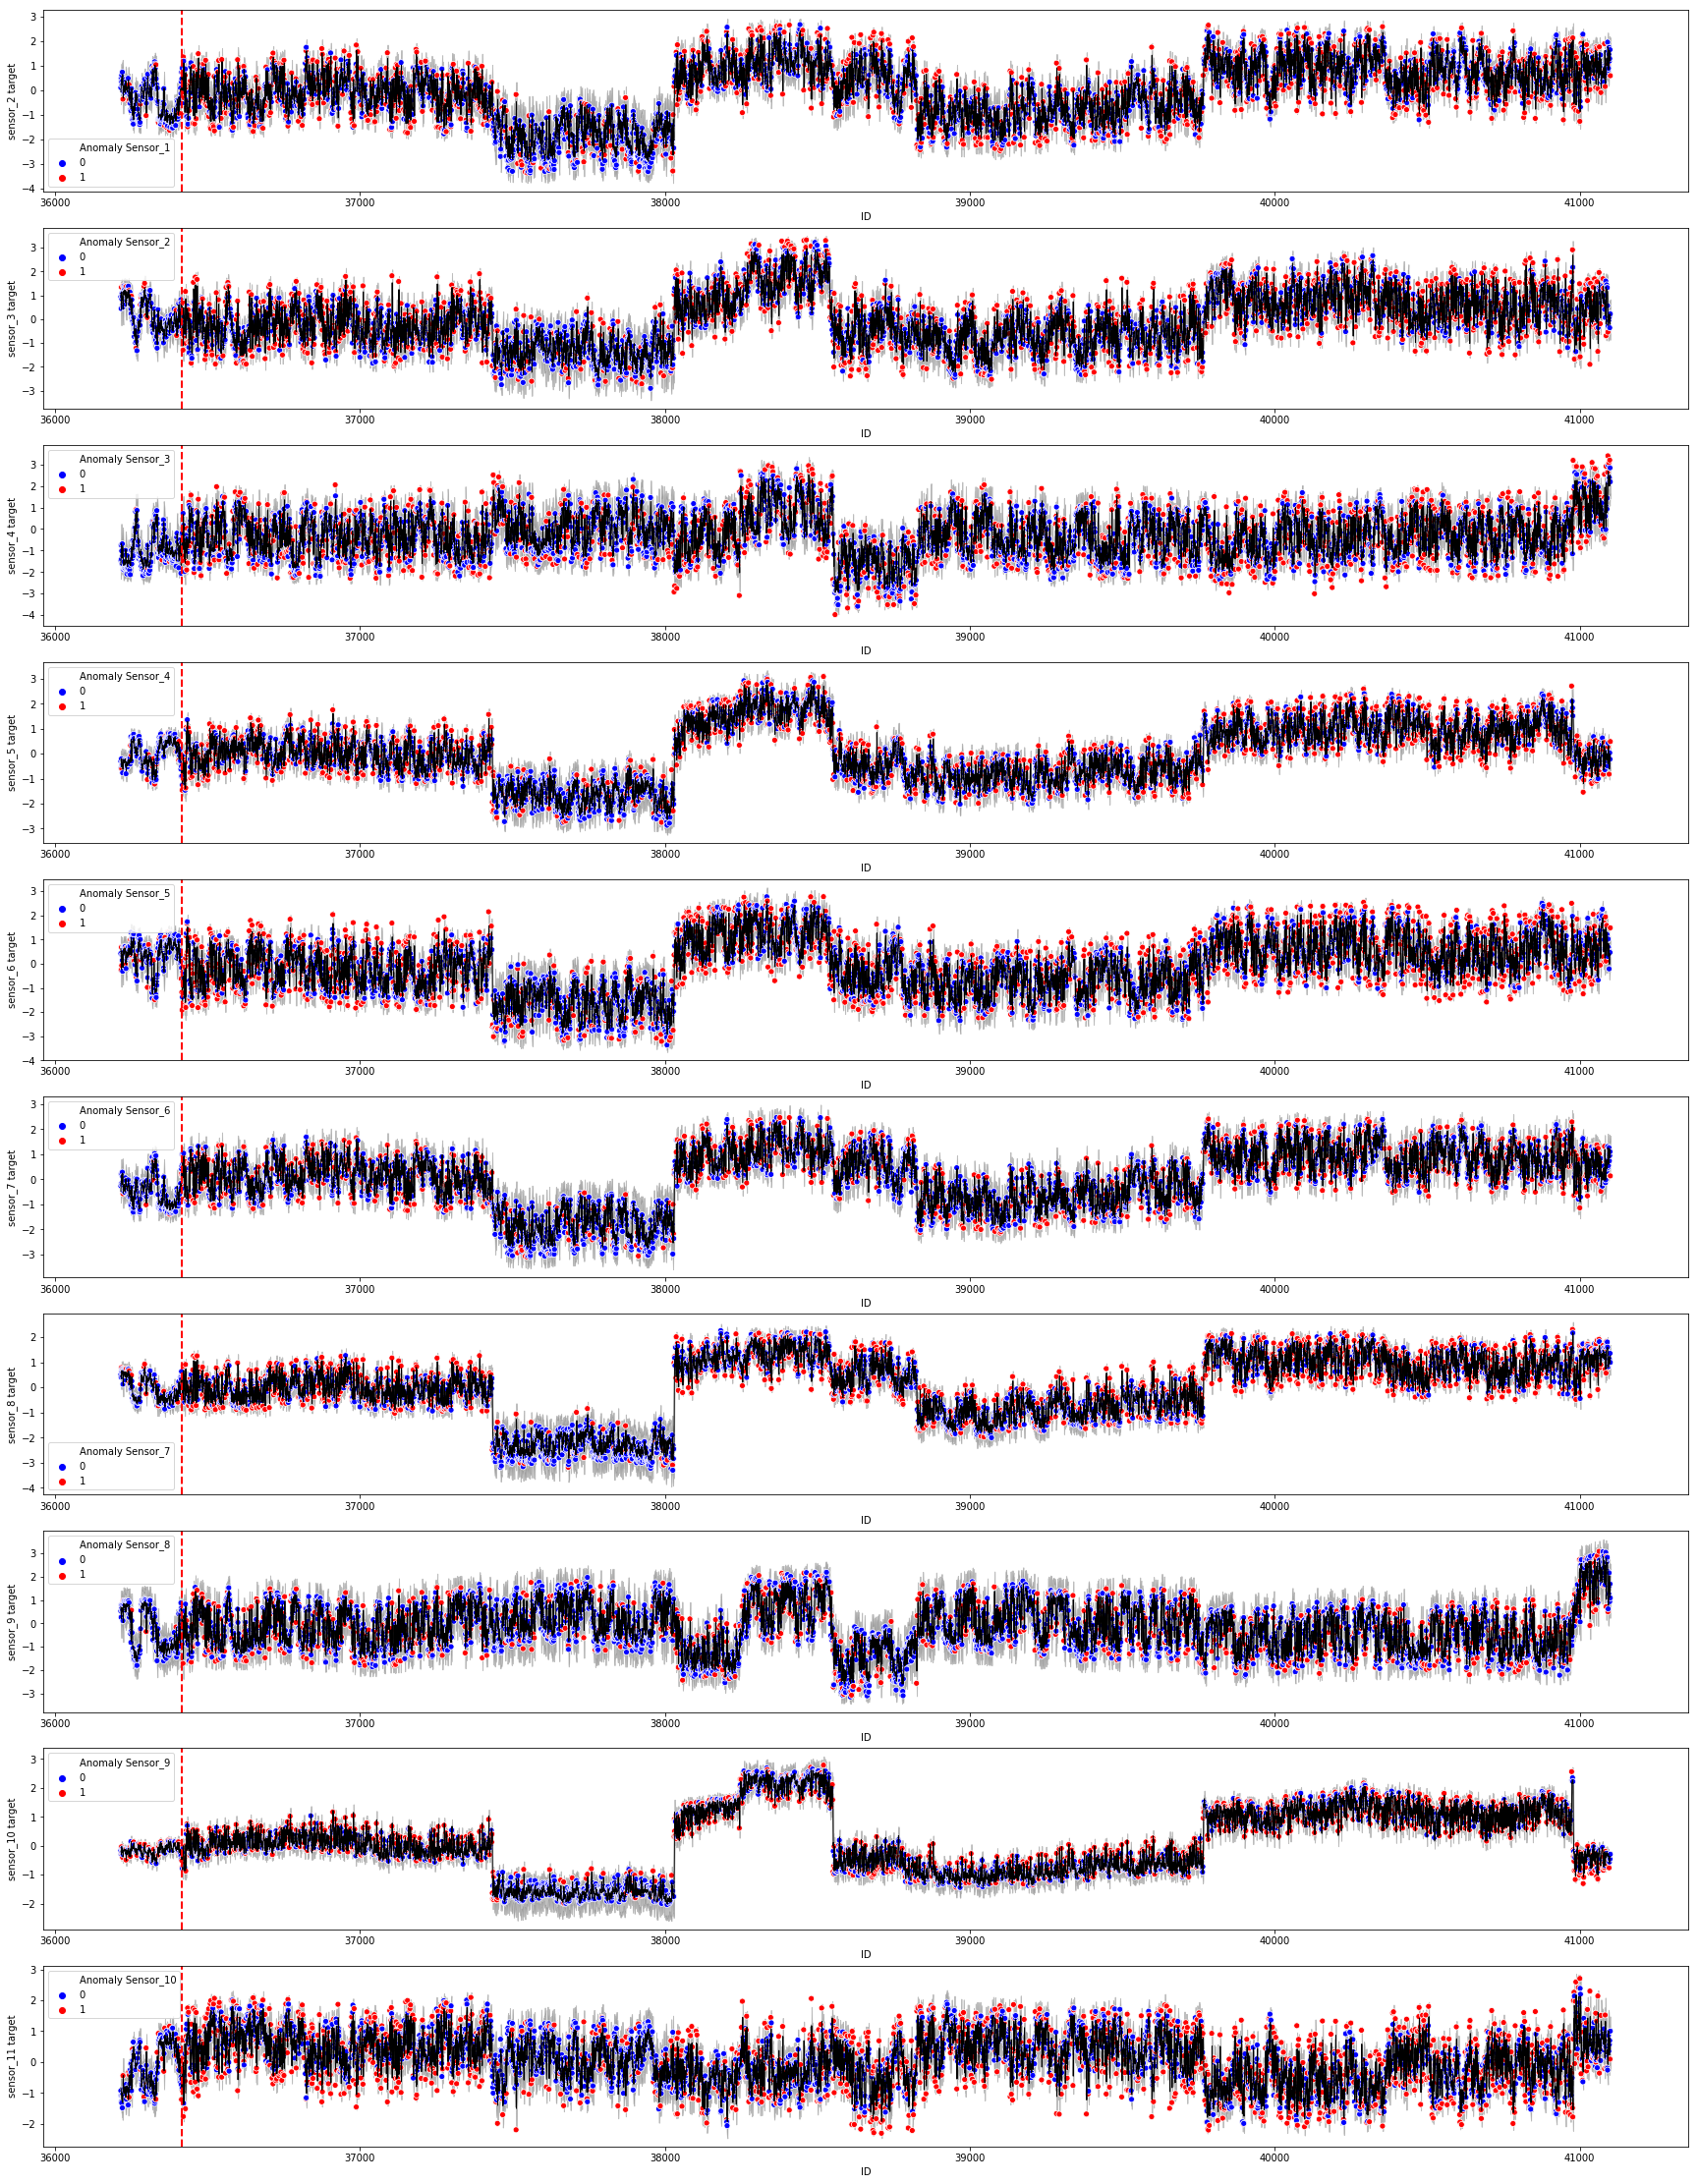

In [11]:
visualise_mle_prediction(dataframe = artifical_data,
                         no_features=10, 
                         first_feature=1, 
                         last_feature=11,
                         line = True,
                         location_line = start_phase_2
                        )
plt.show()